In [ ]:
import pandas as pd
import numpy as np
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
nltk.download("stopwords")


from nltk.corpus import stopwords
from nltk.stem.porter import *
from sklearn.model_selection import train_test_split

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## Load the datafame

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/kaushi/Sinhala_mithuru/Function1/dataset/sentences/Grade 3 & 4 Dataset  - Grade 3 & 4 (1).csv", encoding="utf-8")
df.head(10)


,Sentences,class
0,මල පිපෙයි.,correct
1,ගඟ ගලයි.,correct
2,තරු බබළයි.,correct
3,කපුටෝ කෑගසති.,correct
4,මම කමි.,correct
5,නුඹ කන්නෙහි.,correct
6,ඔහු කයි.,correct
7,ඇය කයි.,correct
8,අපි කමු.,correct
9,ඔවුහු කති.,correct


In [ ]:
df.isnull().sum()
df.isna()
df.dropna(axis=0,inplace=True)
df.head()
print(df["class"].value_counts())

class
correct      1029
incorrect    1029
Name: count, dtype: int64


In [ ]:
df

,Sentences,class
0,මල පිපෙයි.,correct
1,ගඟ ගලයි.,correct
2,තරු බබළයි.,correct
3,කපුටෝ කෑගසති.,correct
4,මම කමි.,correct
...,...,...
2059,ලේඛකයා ග්‍රන්ථය නව මුද්‍රණය කළෝය අද නිසොල්මනේ.,incorrect
2060,ගෞරවය සහ උපහාරය සියල්ලන්ටම අවශ්‍ය වේ සැමදා ලබා...,incorrect
2061,නිලධාරීහු සියලු ලේඛන වෙත යොමු විය අද නිවැරදිව ...,incorrect
2062,ජනතාව උවදුරින් පීඩාවට පත්වූහ නිතර ප්‍රදේශයේ.,incorrect


## Preprocess

In [ ]:
def pre_text(tweet):
    ''' Convert tweet text into a sequence of words '''

    # convert to lowercase
    text = tweet.lower()
    # remove non letters
    #text = re.sub(r"[^a-zA-Z0-9]", " ", text)
    # tokenize
    words = text.split()
    # remove stopwords
    #words = [w for w in words if w not in stopwords.words("english")]
    # apply stemming
    #words = [PorterStemmer().stem(w) for w in words]
    # return list

    final_text=' '.join(words)
    return final_text

print("\nOriginal tweet ->", df['Sentences'][12])
print("\nProcessed tweet ->", pre_text(df['Sentences'][12]))


Original tweet -> ඔහු බොයි.

Processed tweet -> ඔහු බොයි.


In [ ]:
# Apply data processing to each tweet
pre_text_list = list(map(pre_text, df['Sentences']))

In [ ]:
print(pre_text_list)

['මල පිපෙයි.', 'ගඟ ගලයි.', 'තරු බබළයි.', 'කපුටෝ කෑගසති.', 'මම කමි.', 'නුඹ කන්නෙහි.', 'ඔහු කයි.', 'ඇය කයි.', 'අපි කමු.', 'ඔවුහු කති.', 'මම බොමි.', 'නුඹ බොන්නෙහි.', 'ඔහු බොයි.', 'අපි බොමු.', 'ඔවුහු බොති.', 'මම යෙමි.', 'නුඹ යන්නෙහි.', 'ඔහු යයි.', 'අපි යමු.', 'ඔවුහු යති.', 'මම එමි.', 'නුඹ එන්නෙහි.', 'ඇය එයි.', 'අපි එමු.', 'ඔවුහු එති.', 'මම දකිමි.', 'නුඹ දක්නෙහි.', 'ඔහු දකීයි.', 'අපි දකිමු.', 'ඔවුහු දකිති.', 'මම කියමි.', 'නුඹ කියන්නෙහි.', 'ඇය කියයි.', 'අපි කියමු.', 'ඔවුහු කියති.', 'මම ගනිමි.', 'නුඹ ගනෙහි.', 'ඔහු ගනීයි.', 'අපි ගනිමු.', 'ඔවුහු ගනිති.', 'මම දිවෙමි.', 'නුඹ දුවන්නෙහි.', 'ඇය දුවයි.', 'අපි දුවමු.', 'ඔවුහු දුවති.', 'මම ලියමි.', 'නුඹ ලියන්නෙහි.', 'ඔහු ලියයි.', 'අපි ලියමු.', 'ඔවුහු ලියති.', 'මම දෙමි.', 'නුඹ දෙන්නෙහි.', 'ඔහු දෙයි.', 'අපි කැමැත්තෙමු.', 'ගින්න නිවෙයි.', 'බෝලය පෙරළෙයි.', 'පහන දැල්වෙයි.', 'වීදුරුව බිඳෙයි.', 'ප්\u200dරතිපල ලැබෙයි.', 'කන්ද උස ය.', 'මම බත් කමි.', 'මම තේ බොමි.', 'මම ගමට යෙමි.', 'මම ගීයක් ගයමි.', 'මම පොත ලියමි.', 'මම මුහුණ සෝදමි.', 'මම ඇය දකිමි.', 'මම තෑග්ගක් 

## tokenize

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_words = 550
max_len=10

def tokenize_pad_sequences(text):
    '''
    This function tokenize the input text into sequnences of intergers and then
    pad each sequence to the same length
    '''
    # Text tokenization
    tokenizer = Tokenizer(num_words=max_words, lower=True, split=' ')
    tokenizer.fit_on_texts(text)
    # Transforms text to a sequence of integers
    X = tokenizer.texts_to_sequences(text)
    # Pad sequences to the same length
    X = pad_sequences(X, padding='post', maxlen=max_len)
    # return sequences
    return X, tokenizer

print('Before preProcessing \n', df['Sentences'][12])
print('Before Tokenization & Padding \n', pre_text_list[12])
X, tokenizer = tokenize_pad_sequences(pre_text_list)
print('After Tokenization & Padding \n', X[12])

Before preProcessing 
 ඔහු බොයි.
Before Tokenization & Padding 
 ඔහු බොයි.
After Tokenization & Padding 
 [  6 232   0   0   0   0   0   0   0   0]


In [ ]:
word2idx = tokenizer.word_index
V = len(word2idx)
print('Found %s unique tokens.' % V)

Found 1211 unique tokens.


### Define X and y

In [ ]:
#independent variable
x=X

In [ ]:
from tensorflow.keras.utils import to_categorical
# softmax
# Map labels to integers
label_map = {"incorrect": 0, "correct": 1}  # assign 0/1
y_int= df["class"].map(label_map).astype(int).values
print("Integer labels:", y_int)

Integer labels: [1 1 1 ... 0 0 0]


#### softmax

In [ ]:
y_softmax= to_categorical(y_int, num_classes=2)
print("Softmax one-hot labels shape:", y_softmax.shape)
print(y_softmax[:5])

Softmax one-hot labels shape: (2058, 2)
[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


#### sigmoid

In [ ]:
# sigmoid
y_binary = y_int.reshape(-1, 1)  # shape (num_samples, 1)
print("Binary labels shape:", y_binary.shape)
print(y_binary[:5])


Binary labels shape: (828, 1)
[[1]
 [1]
 [1]
 [1]
 [1]]


## Training testing split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y_softmax, test_size=0.2, random_state=24)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=24)



In [ ]:
print("X_train :",X_train.shape)
print("y_train :",y_train.shape)
print("x_test:",X_test.shape)
print("y_test ;",y_test.shape)
print(X_train[:5])
print(y_train[:5])

X_train : (1234, 10)
y_train : (1234, 2)
x_test: (412, 10)
y_test ; (412, 2)
[[ 10 110 104   0   0   0   0   0   0   0]
 [198  76 218  16  34  31  53   0   0   0]
 [  9  74  33   0   0   0   0   0   0   0]
 [199 393 394 200  19 120   0   0   0   0]
 [431 430  19  17 429   0   0   0   0   0]]
[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [ ]:
print(X_val.shape)
print(y_val.shape)

(412, 10)
(412, 2)


## Training model

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, Dropout,BatchNormalization
from keras.metrics import Precision, Recall
from keras.optimizers import SGD
from keras.optimizers import RMSprop
from keras import datasets

from keras.callbacks import LearningRateScheduler
from keras.callbacks import History

from keras import losses

from tensorflow.keras.optimizers import legacy as legacy_optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

### Model 1 architecture

In [ ]:
vocab_size = 550
embedding_size = 8
learning_rate = 0.1
decay_rate = learning_rate / epochs
momentum = 0.8


sgd = SGD(learning_rate=learning_rate, momentum=momentum, nesterov=False)
# # Build model
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_size, input_shape=(max_len,)))
model.add(Conv1D(filters=4, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Bidirectional(LSTM(8)))
model.add(Dropout(0.4))
model.add(Dense(2, activation='softmax'))
print(model.summary())

# model = Sequential()
# model.add(Embedding(input_dim=vocab_size, output_dim=embedding_size, input_shape=(max_len,)))
# model.add(Conv1D(filters=4, kernel_size=3, padding='same', activation='relu'))
# model.add(MaxPooling1D(pool_size=2))
# model.add(LSTM(8, return_sequences=True))
# model.add(Bidirectional(LSTM(8)))
# model.add(Dropout(0.4))
# model.add(Dense(1, activation='sigmoid'))
# print(model.summary())

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:100: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_69"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_69 (Embedding)        │ (None, 10, 8)          │         4,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_32 (Conv1D)              │ (None, 10, 4)          │           100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_33 (MaxPooling1D) │ (None, 5, 4)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_31                │ (None, 16)             │           832 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_92 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_69 (Dense)                │ (None, 2)              │            34 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,366 (20.96 KB)

 Trainable params: 5,366 (20.96 KB)

 Non-trainable params: 0 (0.00 B)

None


### Model 2 architecture

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, BatchNormalization, Dropout, Dense
from tensorflow.keras.layers import TimeDistributed


# Model
model2= Sequential()
model2.add(Embedding(input_dim=vocab_size, output_dim=embedding_size, input_shape=(max_len,)))
model2.add(LSTM(4))  # 1 LSTM node
model2.add(Dropout(0.2))
model2.add(Dense(2, activation='softmax'))
print(model2.summary())





# Build binary classification model
# model2 = Sequential()
# model2.add(Embedding(input_dim=vocab_size, output_dim=embedding_size, input_shape=(max_len,)))
# model2.add(LSTM(8, return_sequences=True))
# model2.add(BatchNormalization())
# model2.add(Dropout(0.2))
# model2.add(LSTM(8))  # last LSTM, returns last output
# model2.add(Dense(1, activation='sigmoid'))  # single neuron for binary classification
# print(model2.summary())


Model: "sequential_70"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_70 (Embedding)        │ (None, 10, 8)          │         4,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_113 (LSTM)                 │ (None, 4)              │           208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_93 (Dropout)            │ (None, 4)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_70 (Dense)                │ (None, 2)              │            10 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,618 (18.04 KB)

 Trainable params: 4,618 (18.04 KB)

 Non-trainable params: 0 (0.00 B)

None


## save model

In [ ]:
#saev the tokenizer
import pickle

# saving
with open('tokenizer_sentence_1_2.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

# loading
with open('tokenizer_sentence_1_2.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint


model_filename = 'sentence_1_2.keras'

# Combine the directory and filename
model_path = model_filename

# Define the ModelCheckpoint callback
checkpoint = ModelCheckpoint(model_path, save_best_only=True, monitor='val_loss', verbose=1)

early_stop = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 10)




model_filename2 = 'sentence2_1_2.keras'

# Combine the directory and filename
model_path2 = model_filename2

# Define the ModelCheckpoint callback
checkpoint2 = ModelCheckpoint(model_path2, save_best_only=True, monitor='val_loss', verbose=1)

early_stop = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 10)

In [ ]:
from tensorflow.keras.optimizers import Adam

# Compile model

# Compile with classification loss
model.compile(loss='categorical_crossentropy', optimizer= sgd,metrics=['accuracy', Precision(), Recall()])
# Compile with binary loss
#model.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['accuracy'])

# Compile model
model2.compile(loss='categorical_crossentropy', optimizer=sgd,metrics=['accuracy', Precision(), Recall()])
# Compile with binary loss
#model2.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
import tensorflow as tf
tf.config.run_functions_eagerly(True)

epochs=25


# # Train model
history = model.fit(X_train, y_train,
                      validation_data=(X_val, y_val),
                      batch_size=16, epochs=epochs, verbose=1,
                    callbacks = [checkpoint,early_stop])



Epoch 1/25


/usr/local/lib/python3.12/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step - accuracy: 0.4907 - loss: 0.7085 - precision_81: 0.4907 - recall_81: 0.4907
Epoch 1: val_loss improved from inf to 0.69280, saving model to sentence_1_2.keras
78/78 ━━━━━━━━━━━━━━━━━━━━ 18s 232ms/step - accuracy: 0.4908 - loss: 0.7084 - precision_81: 0.4908 - recall_81: 0.4908 - val_accuracy: 0.5121 - val_loss: 0.6928 - val_precision_81: 0.5121 - val_recall_81: 0.5121
Epoch 2/25
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step - accuracy: 0.5041 - loss: 0.7004 - precision_81: 0.5041 - recall_81: 0.5041
Epoch 2: val_loss did not improve from 0.69280
78/78 ━━━━━━━━━━━━━━━━━━━━ 15s 195ms/step - accuracy: 0.5040 - loss: 0.7005 - precision_81: 0.5040 - recall_81: 0.5040 - val_accuracy: 0.4879 - val_loss: 0.7299 - val_precision_81: 0.4879 - val_recall_81: 0.4879
Epoch 3/25
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step - accuracy: 0.5281 - loss: 0.7040 - precision_81: 0.5281 - recall_81: 0.5281
Epoch 3: val_loss did not improve from 0.69280
78/78 ━━━━━━━━━━━━━━━━━

In [ ]:
print("####################### Model 2 ###################")

# Train model
history = model2.fit(X_train, y_train,
                      validation_data=(X_val, y_val),
                      batch_size=16, epochs=epochs, verbose=1,
                    callbacks = [checkpoint2,early_stop])

####################### Model 2 ###################
Epoch 1/25


/usr/local/lib/python3.12/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


ValueError: Arguments `target` and `output` must have the same rank (ndim). Received: target.shape=(16, 2), output.shape=(16, 2, 2)

## Models evaluation

In [ ]:
from keras.models import load_model
#Load model
model = load_model(r'/content/sentence_1_2.keras')


# Evaluate model on the test set
loss, accuracy, precision, recall = model.evaluate(X_test, y_test, verbose=0)
# Print metrics
print('')
print('Accuracy  : {:.4f}'.format(accuracy))
print('Precision : {:.4f}'.format(precision))
print('Recall    : {:.4f}'.format(recall))
#print('F1 Score  : {:.4f}'.format(f1_score(precision, recall)))


Accuracy  : 0.7791
Precision : 0.7791
Recall    : 0.7791


In [ ]:
model2 = load_model(r'/content/sentence2_1_2.keras')


# Evaluate model on the test set
loss, accuracy, precision, recall = model2.evaluate(X_test, y_test, verbose=0)
# Print metrics
print('')
print('Accuracy  : {:.4f}'.format(accuracy))
print('Precision : {:.4f}'.format(precision))
print('Recall    : {:.4f}'.format(recall))
#print('F1 Score  : {:.4f}'.format(f1_score(precision, recall)))


Accuracy  : 0.8253
Precision : 0.8253
Recall    : 0.8253


## Confution metrix

Model 1
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step
model2
 1/13 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step

/usr/local/lib/python3.12/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step


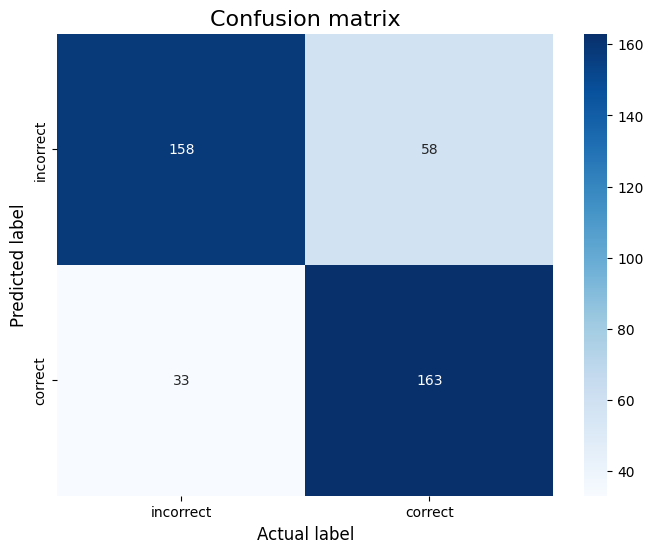

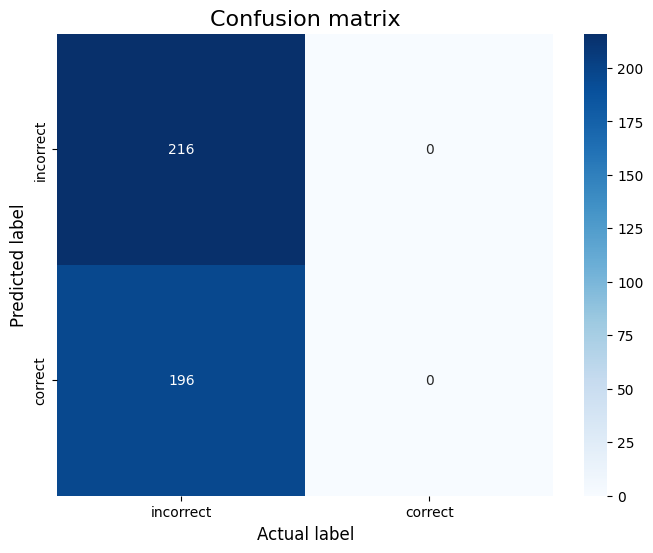

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


def plot_confusion_matrix(model, X_test, y_test):
    '''Function to plot confusion matrix for the passed model and the data'''

    sentiment_classes = ['incorrect', 'correct']
    # use model to do the prediction
    y_pred = model.predict(X_test)
    # compute confusion matrix
    cm = confusion_matrix(np.argmax(np.array(y_test),axis=1), np.argmax(y_pred, axis=1))
    # plot confusion matrix
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d',
                xticklabels=sentiment_classes,
                yticklabels=sentiment_classes)
    plt.title('Confusion matrix', fontsize=16)
    plt.xlabel('Actual label', fontsize=12)
    plt.ylabel('Predicted label', fontsize=12)
print("Model 1")
plot_confusion_matrix(model, X_test, y_test)
print("model2")
plot_confusion_matrix(model2, X_test, y_test)

In [ ]:
from keras.models import load_model

# Load model
#model = load_model('best_model.h5')

def predict_class(text):
    '''Function to predict sentiment class of the passed text'''

    sentiment_classes = ['incorrect', 'correct']
    max_len=100
    final_text=pre_text(text)
    #print(pro_text)
    # Transforms text to a sequence of integers using a tokenizer object
    xt = tokenizer.texts_to_sequences([final_text])
    # Pad sequences to the same length
    xt = pad_sequences(xt, padding='post', maxlen=max_len)
    # Do the prediction using the loaded model
    yt1 = model2.predict(xt)

    print(yt1)

    yt=yt1.argmax(axis=1)
    # Print the predicted sentiment
    print('The predicted sentiment is', sentiment_classes[yt[0]])

In [ ]:
predict_class("ජනෙල් වහන්න")
predict_class("වහන්න ජනෙල්")
predict_class("අරින්න දොර")


/usr/local/lib/python3.12/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 528ms/step
[[0.5051156 0.4948843]]
The predicted sentiment is incorrect
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step
[[0.5051156 0.4948843]]
The predicted sentiment is incorrect
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step
[[0.5051156 0.4948843]]
The predicted sentiment is incorrect
